In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:02<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [ ]:
import os
import PIL as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

print('modules loaded')

modules loaded


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
directory = '/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1'

In [ ]:
#Reading The Dataset
data_dir='/root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1'
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    file_path=os.path.join(data_dir,fold)
    if not os.path.isdir(file_path): # if not a directory, skip
        continue
    fpath = os.listdir(file_path)

    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepath.append(fil_path)
        labels.append(fold)

f_series=pd.Series(filepath,name='filepaths')
l_series=pd.Series(labels,name='labels')
df=pd.concat([f_series, l_series], axis= 1)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

# Update dataset_path using the downloaded path
dataset_path = os.path.join(path, "Rice_Image_Dataset") #This joins the root path from kagglehub with the name of the Dataset folder.

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1


In [ ]:
df.head()

,image,label
0,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
1,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
2,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
3,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine
4,/root/.cache/kagglehub/datasets/muratkokludata...,Jasmine


In [ ]:
#EDA
df['label'].value_counts().sort_index()

,count
label,
Arborio,15000
Basmati,15000
Ipsala,15000
Jasmine,15000
Karacadag,15000


<ipython-input-9-f1d046f76899>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts().values,palette='viridis')


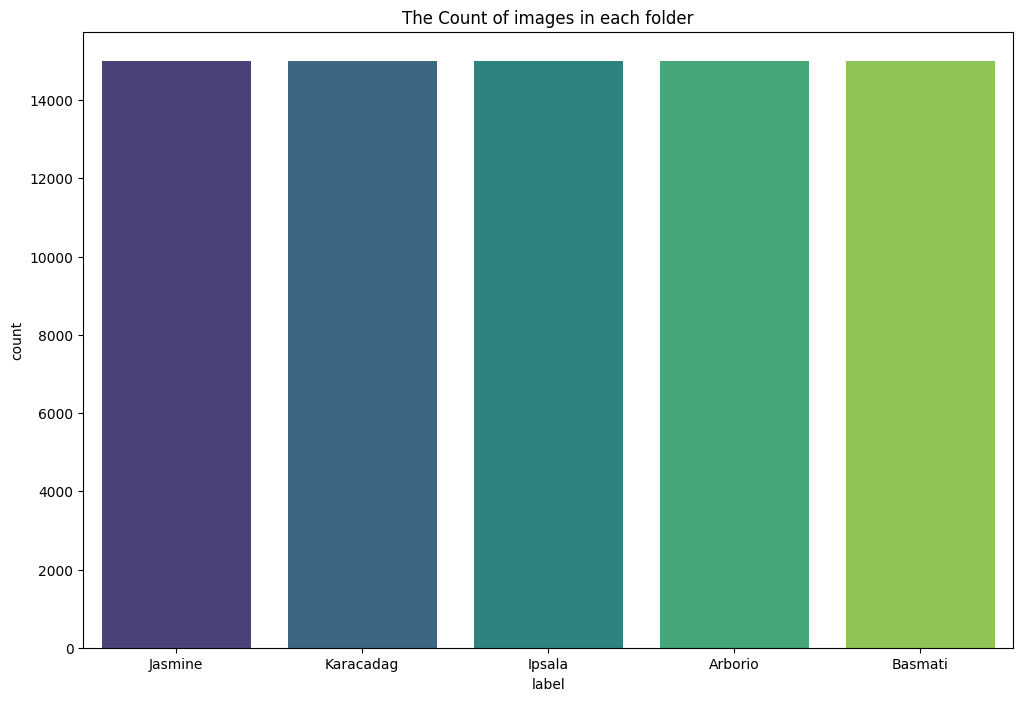

In [ ]:
plt.figure(figsize=(12,8))
sns.pie(x=df['label'].value_counts().index,y=df['label'].value_counts().values,palette='viridis')
plt.title('The Count of images in each folder')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [ ]:
#Preprocessing The Data
#Splitting The Dataset into Train, Test, and Validate Sets

train_df,dummy_df=train_test_split(df,test_size=0.2,random_state=42,stratify=df['label'])
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=dummy_df['label'])

In [ ]:
#Creating Image Data Genearator (data augmentation)
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %%
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

# Update dataset_path using the downloaded path
dataset_path = os.path.join(path, "Rice_Image_Dataset") #This joins the root path from kagglehub with the name of the Dataset folder.

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})
# %%
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

# Make sure to import train_test_split if not already imported
from sklearn.model_selection import train_test_split

# Split the DataFrame before creating the generator
train_df, dummy_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=dummy_df['label'])

# Use 'image' instead of 'filepaths' for x_col
train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

# Use 'image' instead of 'filepaths' for x_col
valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                        color_mode='rgb', shuffle=True, batch_size=batch_size)

# Use 'image' instead of 'filepaths' for x_col
test_gen = ts_gen.flow_from_dataframe(test_df, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1
Found 60000 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


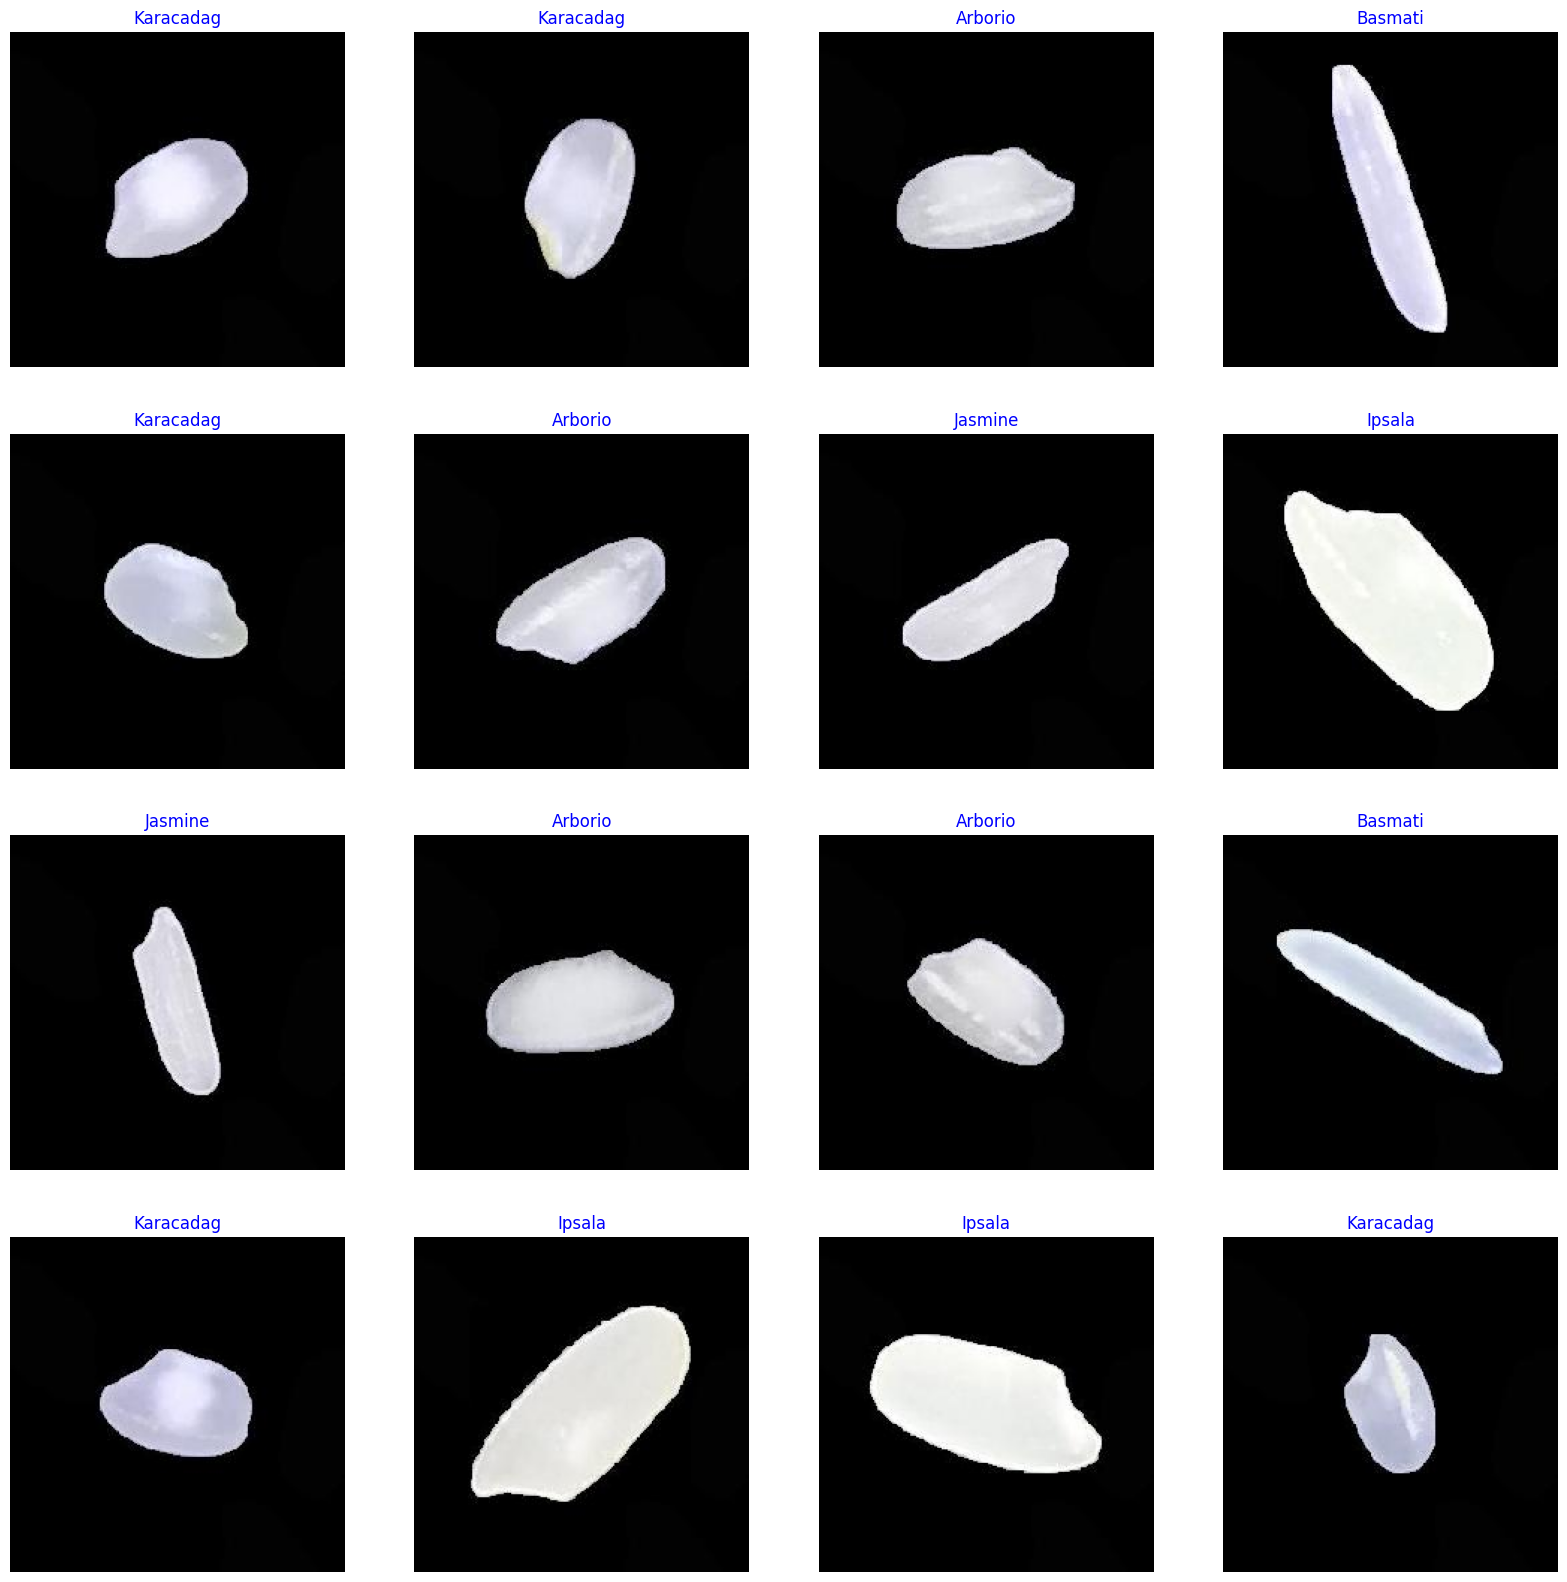

In [ ]:
#Displaying a Sample from The Data

g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
# Define image size and shape
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Determine the number of classes from the training generator
class_count = len(list(train_gen.class_indices.keys()))

# Create the base model using ResNet50
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)
# Add custom layers on top of the base model
x = base_model.output
x = Dense(128, activation='relu')(x)
predictions = Dense(class_count, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with optimizer and loss function
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 23,797,509 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import kagglehub
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Download dataset
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")
dataset_path = os.path.join(path, "Rice_Image_Dataset")

# Load data into DataFrame
images = []
labels = []
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
df = pd.DataFrame({'image': images, 'label': labels})

# Split data
train_df, dummy_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=dummy_df['label'])

# Create ImageDataGenerator
batch_size = 64
img_size = (224, 224)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

# Create train_gen
train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image', y_col='label', target_size=img_size,
                                    class_mode='categorical', color_mode='rgb', shuffle=True,
                                    batch_size=batch_size)

# ... (Rest of your code)

100%|██████████| 219M/219M [00:01<00:00, 143MB/s]

Extracting files...


Found 60000 validated image filenames belonging to 5 classes.


In [ ]:
!pip install kagglehub

In [ ]:
# Define callbacks for early stopping and model checkpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train the model with frozen layers
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=valid_gen,
    callbacks=callbacks
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.9608 - loss: 0.4840
Epoch 1: val_loss improved from inf to 0.01554, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 612s 586ms/step - accuracy: 0.9609 - loss: 0.4836 - val_accuracy: 0.9959 - val_loss: 0.0155
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9952 - loss: 0.0190
Epoch 2: val_loss did not improve from 0.01554
938/938 ━━━━━━━━━━━━━━━━━━━━ 517s 550ms/step - accuracy: 0.9952 - loss: 0.0190 - val_accuracy: 0.9935 - val_loss: 0.0194
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9977 - loss: 0.0076
Epoch 3: val_loss improved from 0.01554 to 0.00710, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 566s 554ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9977 - val_loss: 0.0071
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9974 - loss: 0.0094
Epoch 4: val_loss did not improve from 0.00710
938/938 ━━━━━━━━━━━━━━━━━━━━ 557s 54

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

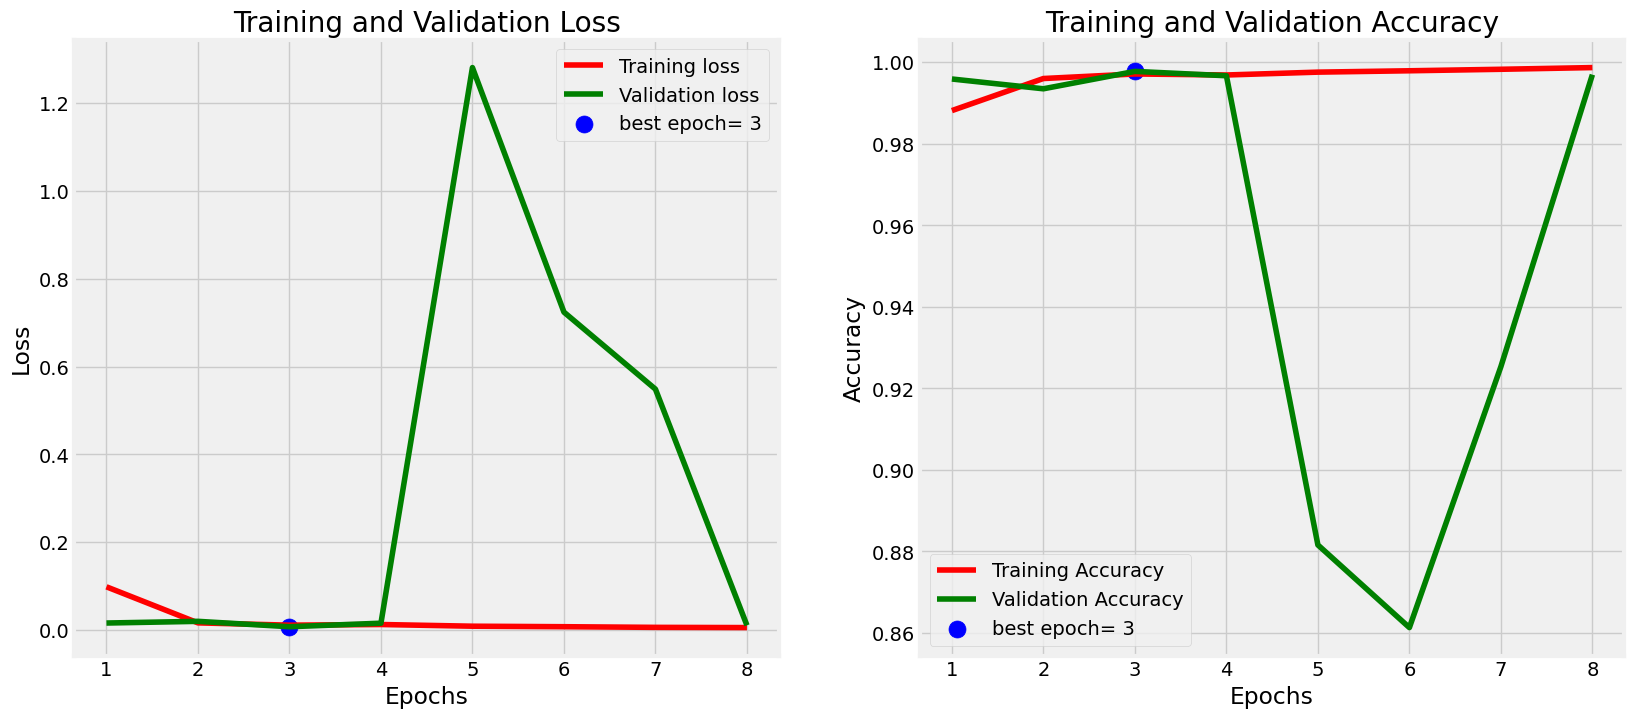

In [ ]:
plot_training(history)

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9990 - loss: 0.0034
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9954 - loss: 0.0131


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.9981 - loss: 0.0071
Train Loss:  0.0050206901505589485
Train Accuracy:  0.9987499713897705
--------------------
Validation Loss:  0.010880992747843266
Validation Accuracy:  0.996874988079071
--------------------
Test Loss:  0.008029978722333908
Test Accuracy:  0.9975000023841858


118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 150ms/step


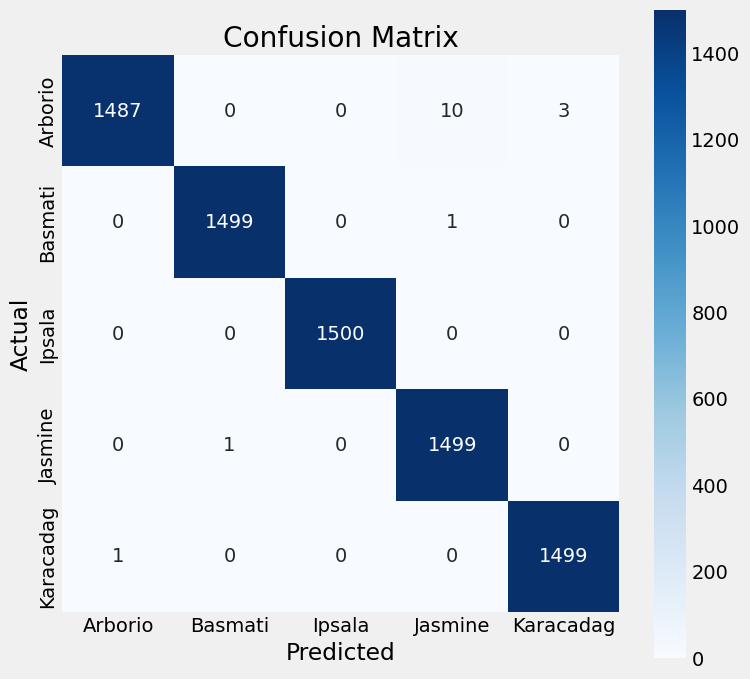

In [ ]:
# Make sure confusion_matrix is imported from sklearn.metrics
from sklearn.metrics import confusion_matrix
# Import seaborn
import seaborn as sns

# Get predictions for the test data
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
true_classes = test_gen.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)  # Now confusion_matrix is defined

# # Plot confusion matrix
# import seaborn as sns # This is redundant as we have already imported it above
# import matplotlib.pyplot as plt # This is redundant as we have imported it previously

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()